In [1]:
# !pip install matplotlib
import tensorflow as tf
import shutil

In [4]:
shutil.copy("/content/drive/MyDrive/Colab Notebooks/New Emotion.zip",'/content/New_Emotion.zip')

'/content/New_Emotion.zip'

In [6]:
!unzip New_Emotion.zip

Streaming output truncated to the last 5000 lines.
 extracting: Emotion_dataset/train/sad/im370.png  
 extracting: Emotion_dataset/train/sad/im3700.png  
 extracting: Emotion_dataset/train/sad/im3701.png  
 extracting: Emotion_dataset/train/sad/im3702.png  
 extracting: Emotion_dataset/train/sad/im3703.png  
 extracting: Emotion_dataset/train/sad/im3704.png  
 extracting: Emotion_dataset/train/sad/im3705.png  
 extracting: Emotion_dataset/train/sad/im3706.png  
 extracting: Emotion_dataset/train/sad/im3707.png  
 extracting: Emotion_dataset/train/sad/im3708.png  
 extracting: Emotion_dataset/train/sad/im3709.png  
 extracting: Emotion_dataset/train/sad/im371.png  
 extracting: Emotion_dataset/train/sad/im3710.png  
 extracting: Emotion_dataset/train/sad/im3711.png  
 extracting: Emotion_dataset/train/sad/im3712.png  
 extracting: Emotion_dataset/train/sad/im3713.png  
 extracting: Emotion_dataset/train/sad/im3714.png  
 extracting: Emotion_dataset/train/sad/im3715.png  
 extracting: Em

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [8]:
  datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2,
                              rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

datast = ImageDataGenerator(rescale = 1./255)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = validation_datagen.flow_from_directory(
    'Emotion_dataset/train',
    target_size=(48, 48),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

train_generator = datagen.flow_from_directory(
    'Emotion_dataset/train',
    target_size = (48,48),
    batch_size = 32,
    class_mode = 'sparse',
    subset = 'training'
)

test_generator = datast.flow_from_directory(
    'Emotion_dataset/test',
    target_size = (48,48),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 5098 images belonging to 6 classes.
Found 20397 images belonging to 6 classes.
Found 6548 images belonging to 6 classes.


In [9]:
train_generator.class_indices

{'angry': 0, 'fearful': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprised': 5}

In [10]:
class_weights={
    0: 1.064,
    1: 1.037,
    2: 0.958,
    3: 0.856,
    4: 0.880,
    5: 1.340
}

In [11]:
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)

Class names: ['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


neutral
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.34388462 0.34388462 0.34388462]
  [0.30498233 0.30498233 0.30498233]
  [0.3364941  0.3364941  0.3364941 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.3025498  0.3025498  0.3025498 ]
  [0.21383546 0.21383546 0.21383546]
  [0.37640676 0.37640676 0.37640676]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.26501393 0.26501393 0.26501393]
  [0.17809162 0.17809162 0.17809162]
  [0.39924535 0.39924535 0.39924535]]

 ...

 [[0.72033995 0.72033995 0.72033995]
  [0.72391975 0.72391975 0.72391975]
  [0.72934264 0.72934264 0.72934264]
  ...
  [0.6609869  0.6609869  0.6609869 ]
  [0.67688483 0.67688483 0.67688483]
  [0.6938404  0.6938404  0.6938404 ]]

 [[0.73748773 0.73748773 0.73748773]
  [0.74187016 0.74187016 0.74

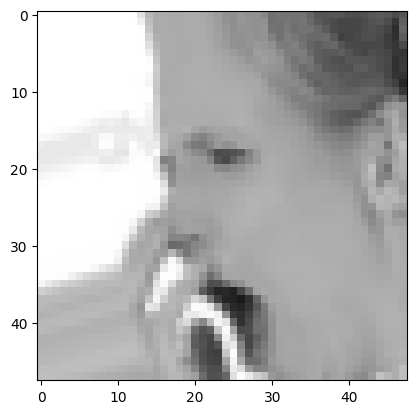

In [12]:
for img,label in train_generator:
  plt.imshow(img[0])
  print(class_names[int(label[0])])
  print(img[0])
  break

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(48,48,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(512,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    Flatten(),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(6,activation='softmax')
])

model.build(input_shape=(None,48,48,3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 2, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,086,278 (7.96 MB)

 Trainable params: 2,084,358 (7.95 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [16]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

history = model.fit(train_generator,epochs=100,validation_data=validation_generator,class_weight = class_weights)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


638/638 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.1999 - loss: 2.3694 - val_accuracy: 0.2564 - val_loss: 1.7594
Epoch 2/100
638/638 ━━━━━━━━━━━━━━━━━━━━ 68s 55ms/step - accuracy: 0.2574 - loss: 1.7152 - val_accuracy: 0.1979 - val_loss: 1.8543
Epoch 3/100
638/638 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - accuracy: 0.2931 - loss: 1.6433 - val_accuracy: 0.3390 - val_loss: 1.5818
Epoch 4/100
638/638 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.3427 - loss: 1.5808 - val_accuracy: 0.3019 - val_loss: 1.6052
Epoch 5/100
638/638 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.3578 - loss: 1.5465 - val_accuracy: 0.4245 - val_loss: 1.4894
Epoch 6/100
638/638 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.3726 - loss: 1.5197 - val_accuracy: 0.3933 - val_loss: 1.5143
Epoch 7/100
638/638 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.3935 - loss: 1.4843 - val_accuracy: 0.3913 - val_loss: 1.5150
Epoch 8/100
638/638 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.4172 - loss: 1.4511 - val_

In [17]:
model.evaluate(test_generator)

205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6155 - loss: 1.0292


[1.0334372520446777, 0.61331707239151]

In [18]:
model.save("Model_best_3.h5")
model.save("Model_best_3.keras")